In [40]:
import yahoo_fin.stock_info as si
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import date
from dateutil.relativedelta import relativedelta
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize']=[24,8]

In [32]:
symbol = 'IBM'
hist_data = si.get_data(symbol)
hist_data

,open,high,low,close,adjclose,volume,ticker
1970-03-25,15.750478,16.108988,15.750478,15.917782,3.744756,1303316,IBM
1970-03-26,15.917782,16.013384,15.905832,15.929732,3.747565,470700,IBM
1970-03-30,15.977533,16.144836,15.977533,16.097036,3.786929,533460,IBM
1970-03-31,16.097036,16.180689,16.061186,16.180689,3.806611,617140,IBM
1970-04-01,16.180689,16.276291,16.120937,16.144836,3.798172,546012,IBM
...,...,...,...,...,...,...,...
2022-05-23,129.500000,131.949997,129.419998,131.169998,131.169998,3591500,IBM
2022-05-24,130.570007,134.369995,130.419998,133.800003,133.800003,4189700,IBM
2022-05-25,132.860001,134.820007,132.860001,134.389999,134.389999,3299300,IBM
2022-05-26,135.000000,137.550003,134.520004,136.889999,136.889999,3929300,IBM


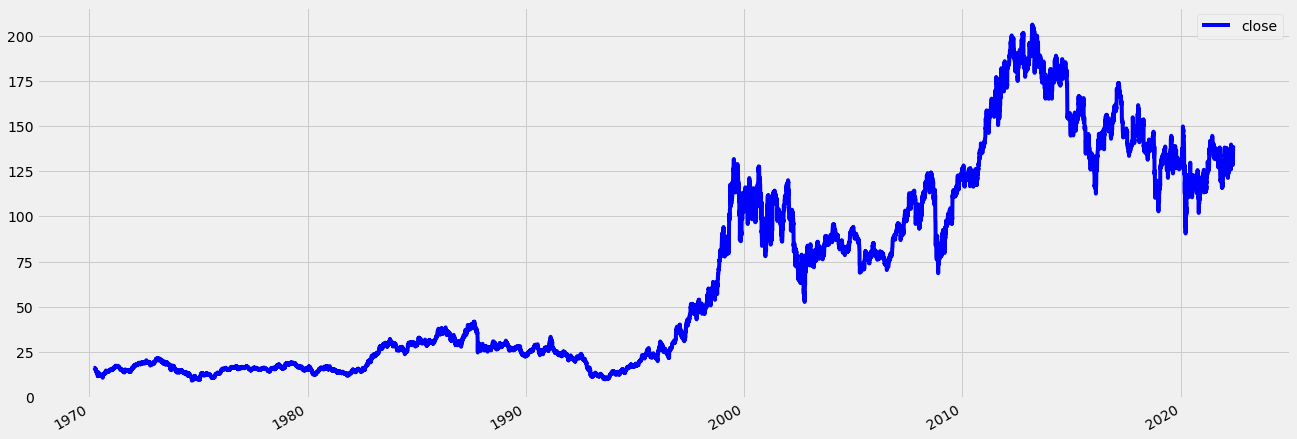

In [33]:
chart = hist_data.plot(kind='line',y='close',color='blue')

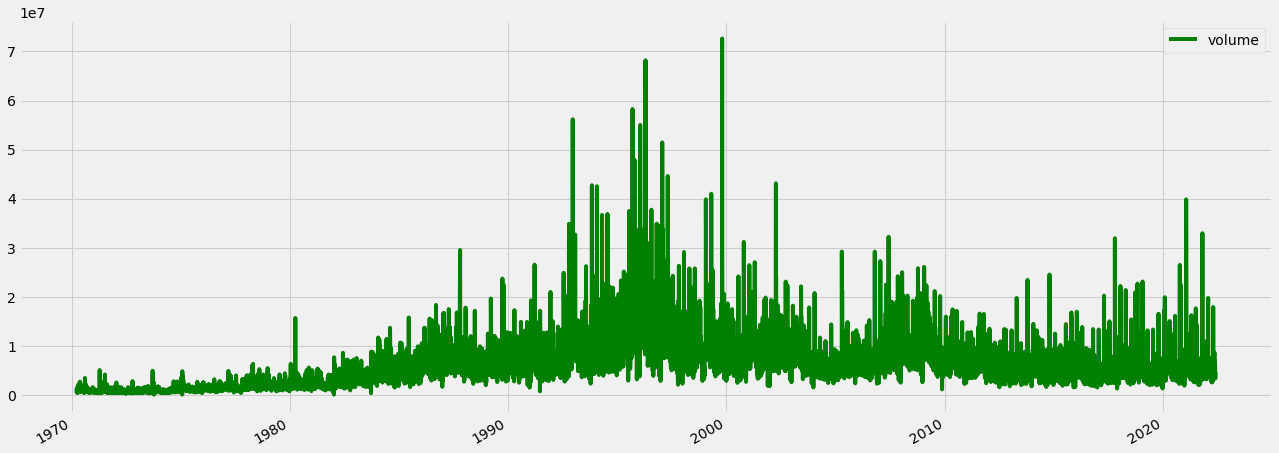

In [34]:
volume = hist_data.plot(kind='line',y='volume',color='green')

In [35]:
income_statement = si.get_income_statement(symbol,yearly=False)
income_statement

endDate,2022-03-31,2021-12-31,2021-09-30,2021-06-30
Breakdown,,,,
researchDevelopment,1679000000,1582000000,1620000000,1657000000
effectOfAccountingCharges,None,None,None,None
incomeBeforeTax,623000000,1061000000,1318000000,1552000000
minorityInterest,62000000,95000000,129000000,125000000
netIncome,733000000,2333000000,1130000000,1325000000
sellingGeneralAdministrative,4787000000,4058000000,5015000000,5433000000
grossProfit,7335000000,5938000000,8278000000,9062000000
ebit,988000000,460000000,1786000000,2103000000
operatingIncome,988000000,460000000,1786000000,2103000000


<AxesSubplot:xlabel='endDate'>

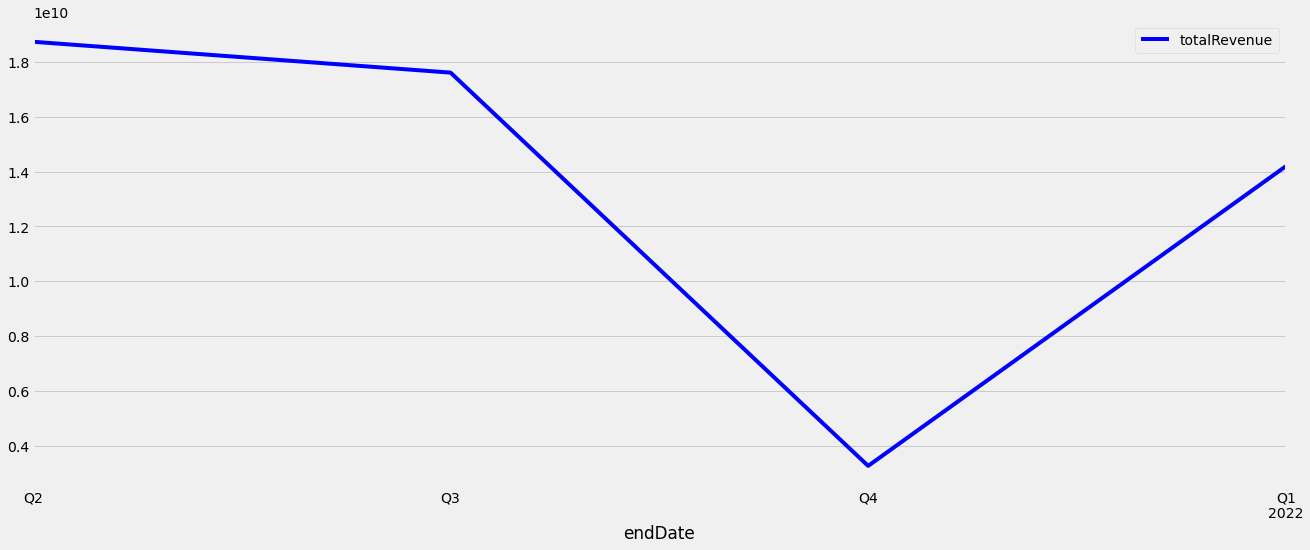

In [36]:
#totalRevenue = 総収入
income_statement_for_graph = si.get_income_statement(symbol,yearly=False).transpose()
income_statement_for_graph.plot(kind='line',y='totalRevenue',color='blue')

<AxesSubplot:xlabel='endDate'>

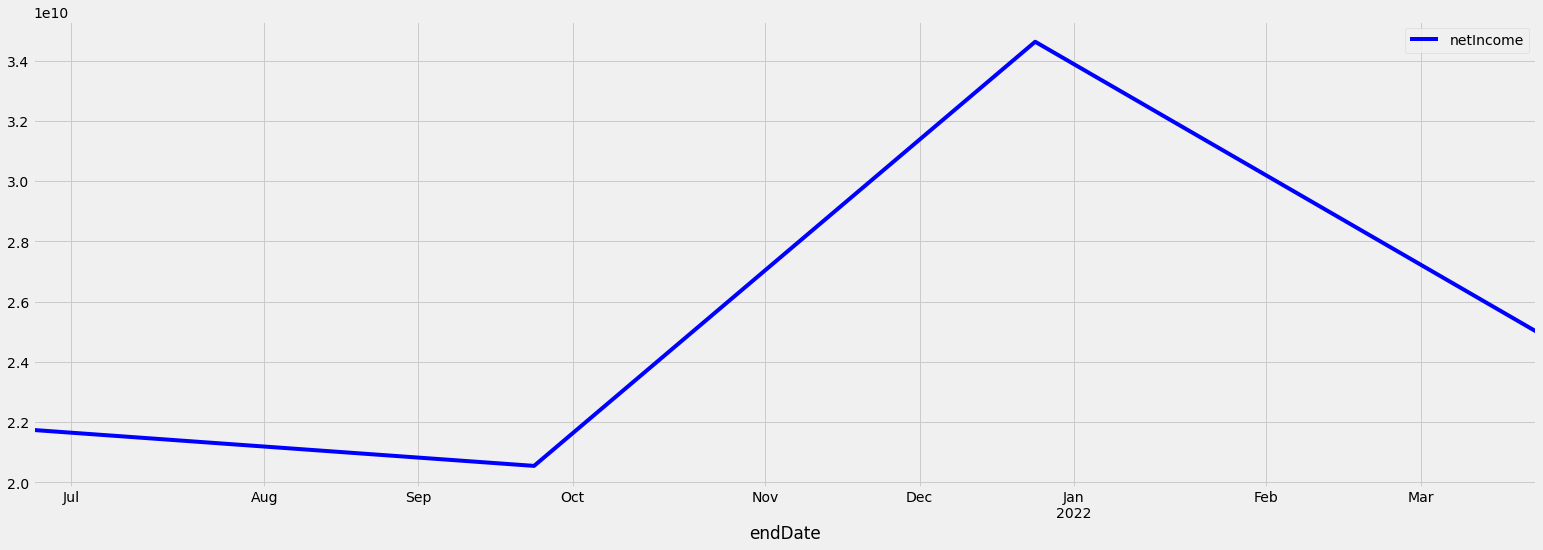

In [21]:
income_statement_for_graph.plot(kind='line',y='netIncome',color='blue')

In [22]:
#ﾏｰｹｯﾄｷｬｯﾌﾟ= 現在の株価*発行株式数
income_statement = si.get_income_statement(symbol,yearly=False)
market_cap = si.get_quote_table(symbol)['Market Cap']
market_cap_char = market_cap[-1]

unit = 0
if market_cap_char == 'B':
    unit = 1000000000
elif market_cap_char == 'T':
    unit = 1000000000000
elif market_cap_char == 'M':
    unit = 1000000


In [23]:
#PSR = ﾏｰｹｯﾄｷｬｯﾌﾟ/年間売上(totalRevenue)
#PSR(PS Ratio)___現在の株価を含む企業の価値

psr = (float(market_cap[:-1])*unit)/(income_statement.loc['totalRevenue'][0]
                                     +income_statement.loc['totalRevenue'][1]
                                     +income_statement.loc['totalRevenue'][2]
                                     +income_statement.loc['totalRevenue'][3])
psr

6.2743350681446675

In [25]:
#40%ルール　売上成長率+四半期利益成長率
#grossProfit  粗利益
Qprofit_growth_rate = income_statement.loc['grossProfit'][0] / income_statement.loc['grossProfit'][1]-1 
Sales_growth_rate = income_statement.loc['totalRevenue'][0] / income_statement.loc['totalRevenue'][1]-1
fourty_rule = Qprofit_growth_rate + Sales_growth_rate
'{0:.0%}'.format(fourty_rule)


'-43%'

In [28]:
nasdaq_list = ['BABA','AAPL','AMZN','FB','IBM','GDS','GOOG','NFLX','TSLA','SWKS','LOGI','TTD']
symbol_list = []
gross_profit_list = []
total_revenue_list = []
gross_growth_list = []
revenue_growth_list = []
fourty_list = []
psr_list = []

for symbol in nasdaq_list:
    try:
        income_statement = si.get_income_statement(symbol,yearly=False)
        Qprofit_growth_rate = income_statement.loc['grossProfit'][0] / income_statement.loc['grossProfit'][1]-1 
        Sales_growth_rate = income_statement.loc['totalRevenue'][0] / income_statement.loc['totalRevenue'][1]-1
        fourty_rule = Qprofit_growth_rate + Sales_growth_rate
        
        if fourty_rule > 0.4:
            gross_profit = income_statement.loc['grossProfit'][0]
            total_revenue = income_statement.loc['totalRevenue'][0]
            gross_growth = income_statement.loc['grossProfit'][0] / income_statement.loc['grossProfit'][1]-1
            total_revenue_growth = income_statement.loc['totalRevenue'][0] / income_statement.loc['totalRevenue'][1]-1
            
            market_cap = si.get_quote_table(symbol)['Market Cap']
            market_cap_char = market_cap[-1]

            unit = 0
            if market_cap_char == 'B':
                unit = 1000000000
            elif market_cap_char == 'T':
                unit = 1000000000000
            elif market_cap_char == 'M':
                unit = 1000000
            
            psr = (float(market_cap[:-1])*unit)/(income_statement.loc['totalRevenue'][0]
                                                 +income_statement.loc['totalRevenue'][1]
                                                 +income_statement.loc['totalRevenue'][2]
                                                 +income_statement.loc['totalRevenue'][3])
            
            symbol_list.append(symbol)
            gross_profit_list.append(gross_profit)
            total_revenue_list.append(total_revenue)
            gross_growth_list.append(gross_growth)
            revenue_growth_list.append(total_revenue_growth)
            fourty_list.append(round(fourty_rule,2)*100)
            psr_list.append(psr)
    
    except Exception as e:
        str(e)

result_df = pd.DataFrame(list(zip(gross_profit_list,total_revenue_list,
                                  gross_growth_list,revenue_growth_list,
                                  fourty_list,psr_list)),columns=['grossProfit','totalRevenue','GrossGrowth',
                                                                  'RevenueGrowth','Percentage','PSR'],index=symbol_list)
result_df
        
        
        

,grossProfit,totalRevenue,GrossGrowth,RevenueGrowth,Percentage,PSR
IBM,7335000000,14197000000,0.235264,3.357581,359.0,2.319484
NFLX,3583062000,7867767000,0.450783,0.020553,47.0,2.852347
LOGI,661136000,1632782000,0.210874,0.249960,46.0,1.742690
TTD,328753000,395598000,0.327271,0.313882,64.0,22.589006


<AxesSubplot:>

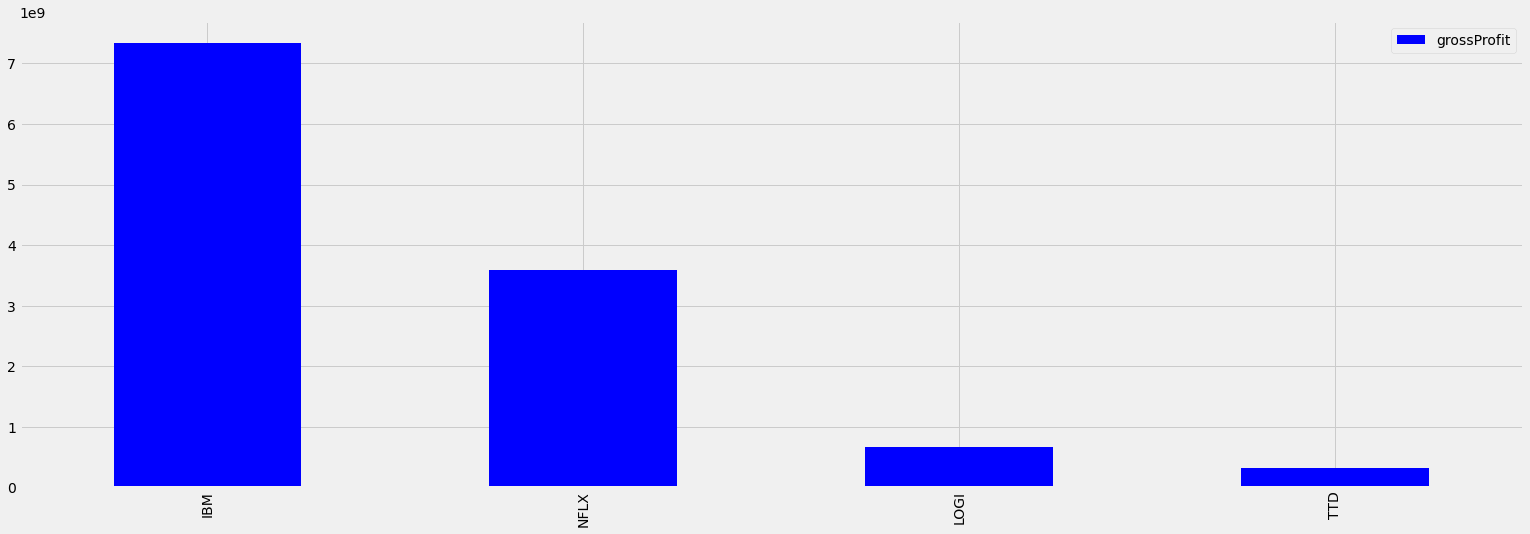

In [29]:
result_df.plot(kind='bar',y='grossProfit',color='blue')

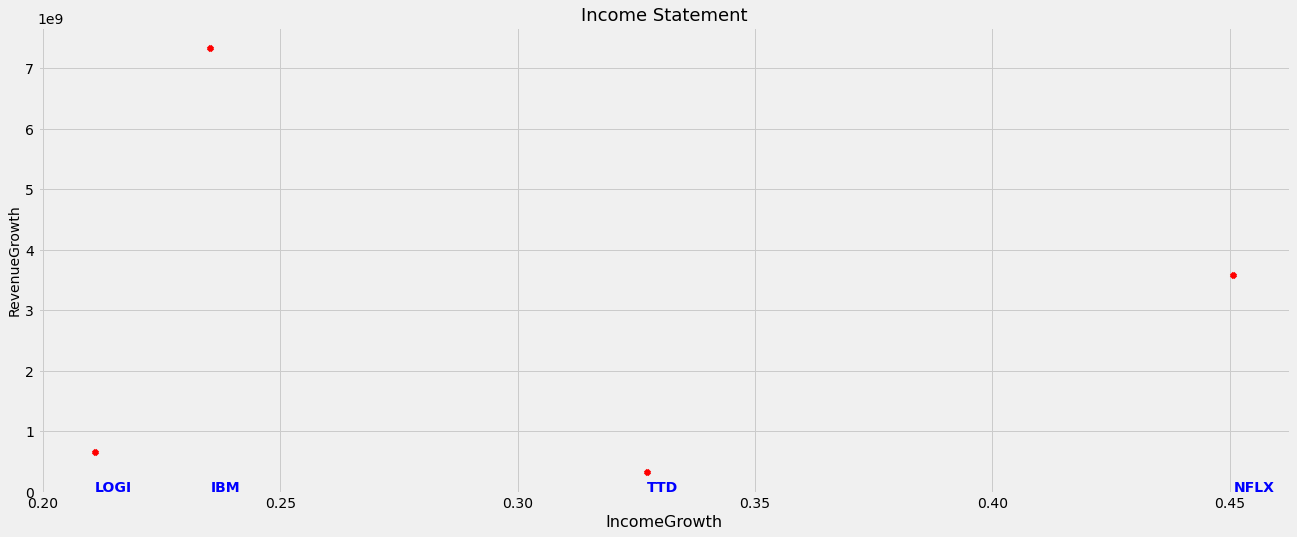

In [31]:
p = result_df.plot(kind='scatter', x='GrossGrowth', y='grossProfit', color='red', marker='x')
p.set_xlabel('IncomeGrowth', fontsize=16)
p.set_ylabel('RevenueGrowth', fontsize=14)
p.set_title('Income Statement', fontsize=18)
plt.rcParams['figure.figsize'] = [20,8]

for i in range(0,result_df.shape[0]):
    p.text(result_df.GrossGrowth[i], result_df.RevenueGrowth[i],
           result_df.index[i], horizontalalignment = 'left',
           size = 'medium', color = 'blue', weight = 'semibold')

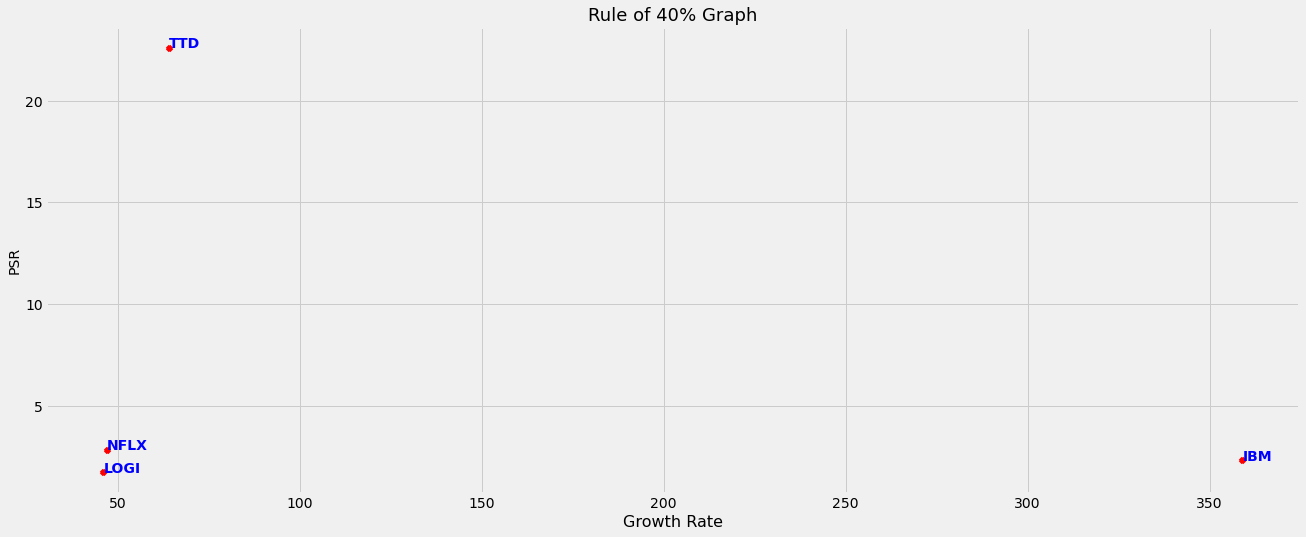

In [37]:
p = result_df.plot(kind='scatter', x='Percentage', y='PSR', color='red', marker='x')
p.set_xlabel('Growth Rate', fontsize=16)
p.set_ylabel('PSR', fontsize=14)
p.set_title('Rule of 40% Graph', fontsize=18)

for i in range(0,result_df.shape[0]):
    p.text(result_df.Percentage[i], result_df.PSR[i],
           result_df.index[i], horizontalalignment = 'left',
           size = 'medium', color = 'blue', weight = 'semibold')

In [42]:
new_colmun = []
for symbol in result_df.index:
    try:
        three_months_ago = date.today() + relativedelta(months=-3)
        three_months_ago_yyyy_mm_dd = three_months_ago.strftime('%Y-%m-%d')
        hist_data = si.get_data(symbol, start_date = three_months_ago_yyyy_mm_dd)
        price_growth = hist_data.iloc[-1, hist_data.columns.get_loc('close')] / hist_data.iloc[0,hist_data.columns.get_loc('close')]-1
        new_colmun.append(price_growth*100)
    except Exception as e:
        print(str(e))

new_colmun

result_df['Price_growth'] = new_colmun

In [43]:
result_df

,grossProfit,totalRevenue,GrossGrowth,RevenueGrowth,Percentage,PSR,Price_growth
IBM,7335000000,14197000000,0.235264,3.357581,359.0,2.319484,13.680517
NFLX,3583062000,7867767000,0.450783,0.020553,47.0,2.852347,-50.524686
LOGI,661136000,1632782000,0.210874,0.249960,46.0,1.742690,-19.319397
TTD,328753000,395598000,0.327271,0.313882,64.0,22.589006,-38.478666


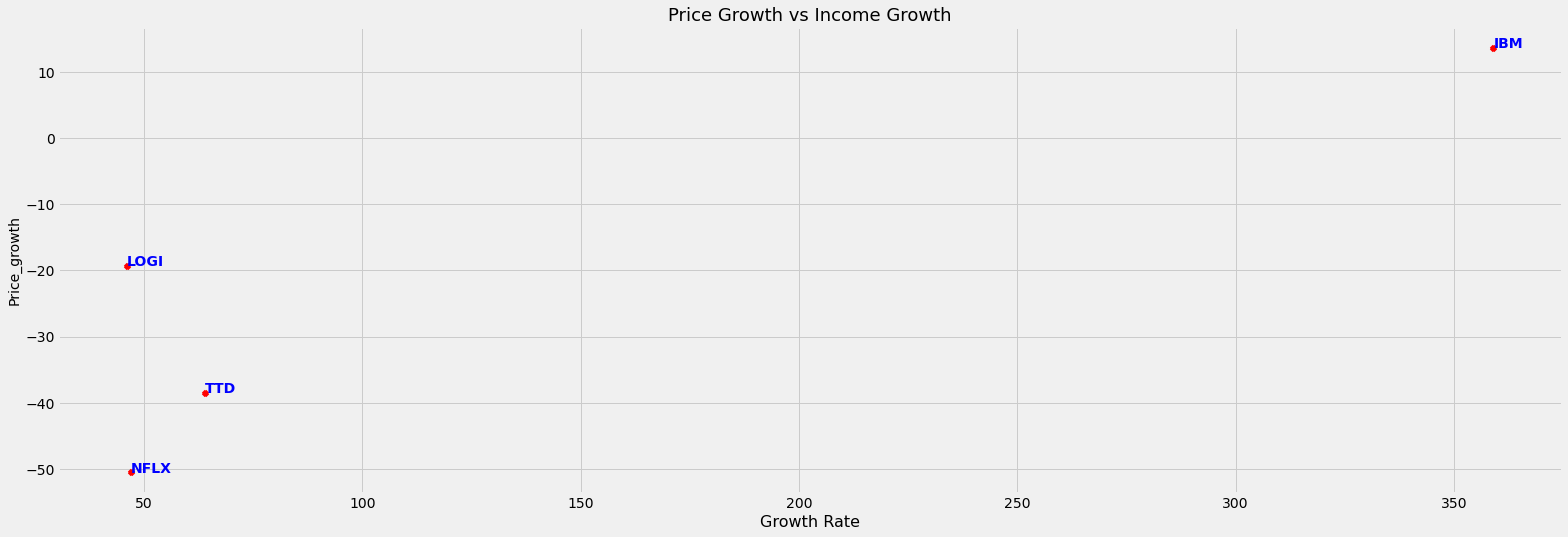

In [44]:
p = result_df.plot(kind='scatter', x='Percentage', y='Price_growth', color='red', marker='x')
p.set_xlabel('Growth Rate', fontsize=16)
p.set_ylabel('Price_growth', fontsize=14)
p.set_title('Price Growth vs Income Growth', fontsize=18)

for i in range(0,result_df.shape[0]):
    p.text(result_df.Percentage[i], result_df.Price_growth[i],
           result_df.index[i], horizontalalignment = 'left',
           size = 'medium', color = 'blue', weight = 'semibold')

In [45]:
new_colmun2 = []
for index,row in result_df.iterrows():
    try:
        new_colmun2.append(row['Percentage'] / row['PSR'])
    except Exception as e:
        print(str(e))
    
result_df['Percentage/PSR'] = new_colmun2
result_df = result_df.sort_values(by=['Percentage/PSR'], ascending=False)
result_df

,grossProfit,totalRevenue,GrossGrowth,RevenueGrowth,Percentage,PSR,Price_growth,Percentage/PSR
IBM,7335000000,14197000000,0.235264,3.357581,359.0,2.319484,13.680517,154.775791
LOGI,661136000,1632782000,0.210874,0.249960,46.0,1.742690,-19.319397,26.395981
NFLX,3583062000,7867767000,0.450783,0.020553,47.0,2.852347,-50.524686,16.477657
TTD,328753000,395598000,0.327271,0.313882,64.0,22.589006,-38.478666,2.833237


In [46]:
new_colmun3 = []
for index,row in result_df.iterrows():
    try:
        market_cap = si.get_quote_table(index)['Market Cap']
        market_cap_char = market_cap[-1]

        unit = 0
        if market_cap_char == 'B':
            unit = 1000000000
        elif market_cap_char == 'T':
            unit = 1000000000000
        elif market_cap_char == 'M':
            unit = 1000000
        
        marketCap = (float(market_cap[:-1]) * unit)
        new_colmun3.append(marketCap)
    except Exception as e:
        print(str(e))
        
result_df['marketCap'] = new_colmun3
result_df

,grossProfit,totalRevenue,GrossGrowth,RevenueGrowth,Percentage,PSR,Price_growth,Percentage/PSR,marketCap
IBM,7335000000,14197000000,0.235264,3.357581,359.0,2.319484,13.680517,154.775791,1.248300e+11
LOGI,661136000,1632782000,0.210874,0.249960,46.0,1.742690,-19.319397,26.395981,9.917000e+09
NFLX,3583062000,7867767000,0.450783,0.020553,47.0,2.852347,-50.524686,16.477657,8.671800e+10
TTD,328753000,395598000,0.327271,0.313882,64.0,22.589006,-38.478666,2.833237,2.412200e+10
